In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,10))

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()
        
    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [5]:
#하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [6]:
# Data Loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

In [8]:
X_train = train_image/255
X_test = test_image/255

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [9]:
train_label[0]

5

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)


In [14]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

# 모델의 크기 변경 

In [11]:
# 작은 모델 => layer층, unit수가 적은 것
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    #Hidden Layer
    model.add(keras.layers.Dense(8, activation='relu'))
    
    #Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 학습
history = model.fit(train_dataset,
          epochs=N_EPOCHS,
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset,
          validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 3s 6ms/step - loss: 0.8767 - accuracy: 0.7355 - val_loss: 0.4433 - val_accuracy: 0.8758
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.4080 - accuracy: 0.8839 - val_loss: 0.3572 - val_accuracy: 0.8977
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3465 - accuracy: 0.9016 - val_loss: 0.3225 - val_accuracy: 0.9070
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3176 - accuracy: 0.9111 - val_loss: 0.3073 - val_accuracy: 0.9126
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3020 - accuracy: 0.9157 - val_loss: 0.3014 - val_accuracy: 0.9135
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2908 - accuracy: 0.9185 - val_loss: 0.2917 - val_accuracy: 0.9173
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2826 - accuracy: 0.9214 - va

<Figure size 1080x720 with 0 Axes>

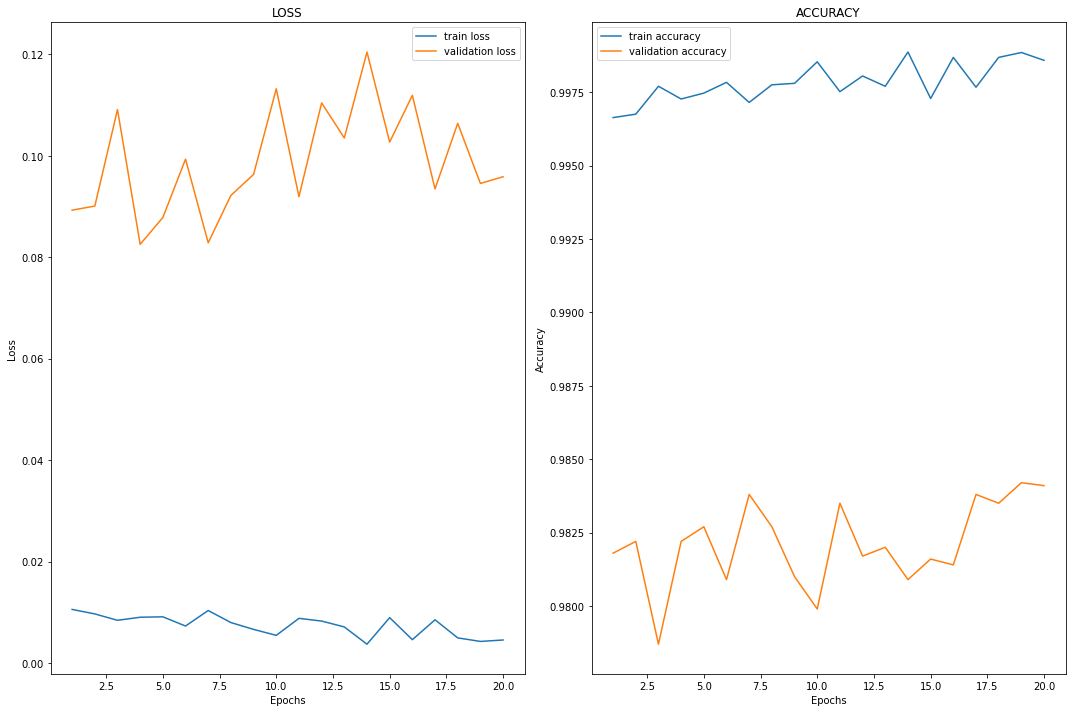

In [28]:
plot_result(history)

In [22]:
# 큰 모델
# hidden layer: 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    #Hidden Layer
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    #Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [23]:
model = create_model()

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [27]:
history = model.fit(train_dataset,
          epochs=N_EPOCHS,
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset,
          validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 9s 16ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0893 - val_accuracy: 0.9818
Epoch 2/20
600/600 [==============================] - 8s 14ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0901 - val_accuracy: 0.9822
Epoch 3/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.1091 - val_accuracy: 0.9787
Epoch 4/20
600/600 [==============================] - 11s 18ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0825 - val_accuracy: 0.9822
Epoch 5/20
600/600 [==============================] - 8s 14ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.0878 - val_accuracy: 0.9827
Epoch 6/20
600/600 [==============================] - 9s 14ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0993 - val_accuracy: 0.9809
Epoch 7/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0104 - accuracy: 0.9

In [26]:
plot_result(history)

NameError: name 'history' is not defined